# Figure 4, ELF1 and NELF1

In [1]:
library(data.table)
library(ggplot2)
library(stringr)
library(tidyplots)
library(ggpubr)
library(patchwork)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:tidyplots’:

    gene_expression




In [2]:
library('Cairo')
CairoFonts(
regular="Sans:style=Light",
bold="Sans:style=Bold",
italic="Sans:style=Oblique",
bolditalic="Sans:style=BoldOblique"
)

## APA data

In [3]:
apa = fread("Fig_4_TDP43-7d-KD_3utr_filtered_apa.csv")

## Fig. 4b, ELP1 polyA_site_plot

In [4]:
ELP1_long = melt(apa[gene_name == "ELP1"], 
    id.vars = "PAS_ID", 
    measure.vars = c('Scramble-7d-1_usage','Scramble-7d-2_usage','Scramble-7d-3_usage',
                     'TDP43KD-7d-1_usage','TDP43KD-7d-2_usage','TDP43KD-7d-3_usage'))
ELP1_long[, condition := tstrsplit(variable, "-", keep = 1)]

In [5]:
ELP1_long[, site := tstrsplit(PAS_ID, ":", keep = 2, type.convert = T)]

In [6]:
ELP1_polyA_site_plot = 
    ggplot(ELP1_long, aes(factor(-site), value, color = condition)) +  
        stat_summary(aes(group = condition),fun = mean, geom = "path", show.legend = F, linewidth = 0.25) +
        stat_summary(fun.data = "mean_se",
                         geom = "errorbar",
                         linewidth = 0.25,
                         width = 0.1,
                         show.legend = F) +
        stat_summary(fun = mean,
                     fun.min = mean,
                     fun.max = mean,
                     geom = "errorbar",
                     linewidth = 0.25,
                     width = 0.15,
                     show.legend = F) +
        geom_jitter(size=1, alpha=0.25, width = 0.1, show.legend = F) +
        scale_color_manual(values = c("black", "orange")) +
        scale_x_discrete(labels = unique(ELP1_long$site)) +
        scale_y_continuous(labels = scales::percent) +
        xlab("ELP1 polyA sites\n(Proximal > Distal)") +
        ylab("PolyA site usage") +
        theme_classic(base_size = 7) +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))

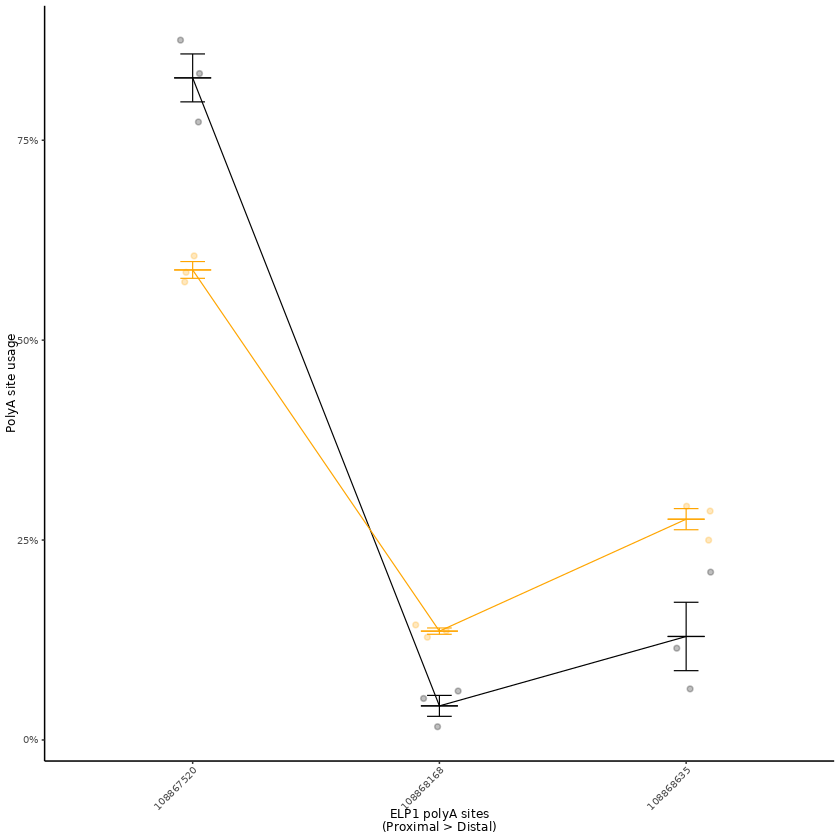

In [7]:
ELP1_polyA_site_plot

In [8]:
ggsave(ELP1_polyA_site_plot, filename = "fig_4a_ELP1_polyA_site_plot.pdf", width = 1.2, height = 1.75, units = "in")

## Fig. 4b, ELP1 WB quantitation

In [12]:
ELP1_WB = fread("Fig_4b_TDP43-7d-KD_ELP1-TDP43-WB-quantitation.csv")

✔ save_plot: saved to fig_4b_TDP43-7D-KD-ELP1-WB-quantitation-plot.pdf



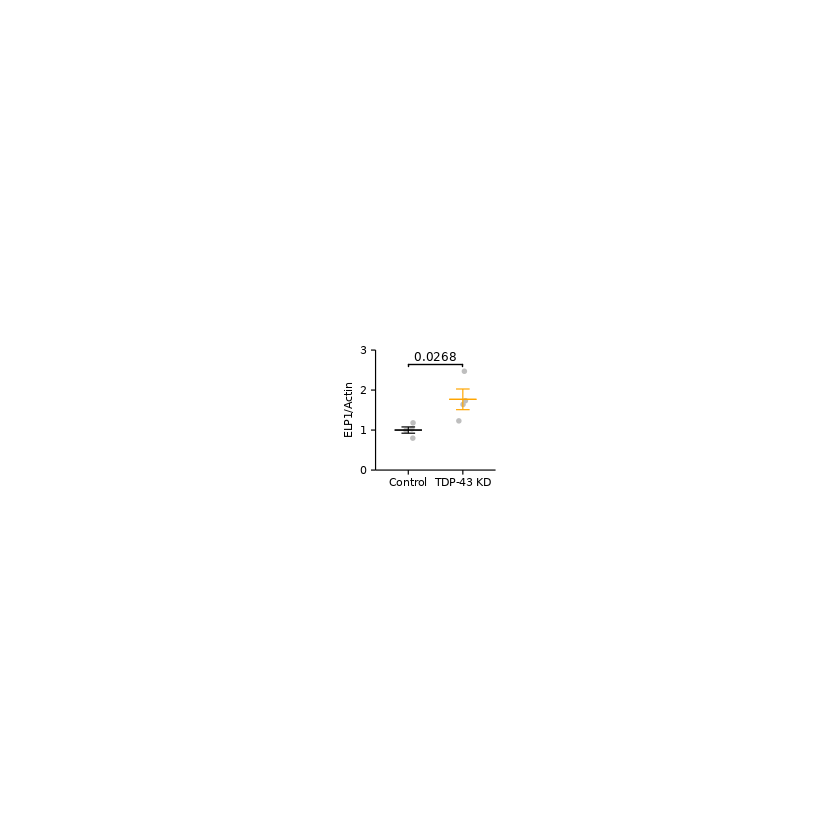

In [13]:
ELP1_WB[target == "ELP1"] |>
    tidyplot(x = Sample, y = normalized_ratio, color = Sample) |>
    add_data_points_jitter(jitter_width = 0.2, size = 0.5, color = "gray") |>
    add_mean_dash(width = 0.5) |>
    add_sem_errorbar(width = 0.25) |>
    add_test_pvalue(hide_info = TRUE, 
                       method = "t_test",
                       method.args = list(alternative = "less"),
                       ref.group = "Control") |>
    adjust_colors(new_colors = c("black", "orange")) |> 
    remove_x_axis_title() |>
    adjust_y_axis(title = "ELP1/Actin",
                  limits = c(0, 3), breaks = c(0, 1, 2, 3)) |>
    remove_legend() |>
    adjust_size(width = 1, height = 1, unit = "in") |>
    adjust_font(fontsize = 6) |>
    save_plot("fig_4b_TDP43-7D-KD-ELP1-WB-quantitation-plot.pdf", 
              view_plot = TRUE,
              bg = "transparent",
              dpi = 300)

✔ save_plot: saved to fig_4b_TDP43-7D-KD-TDP43-WB-quantitation-plot.pdf



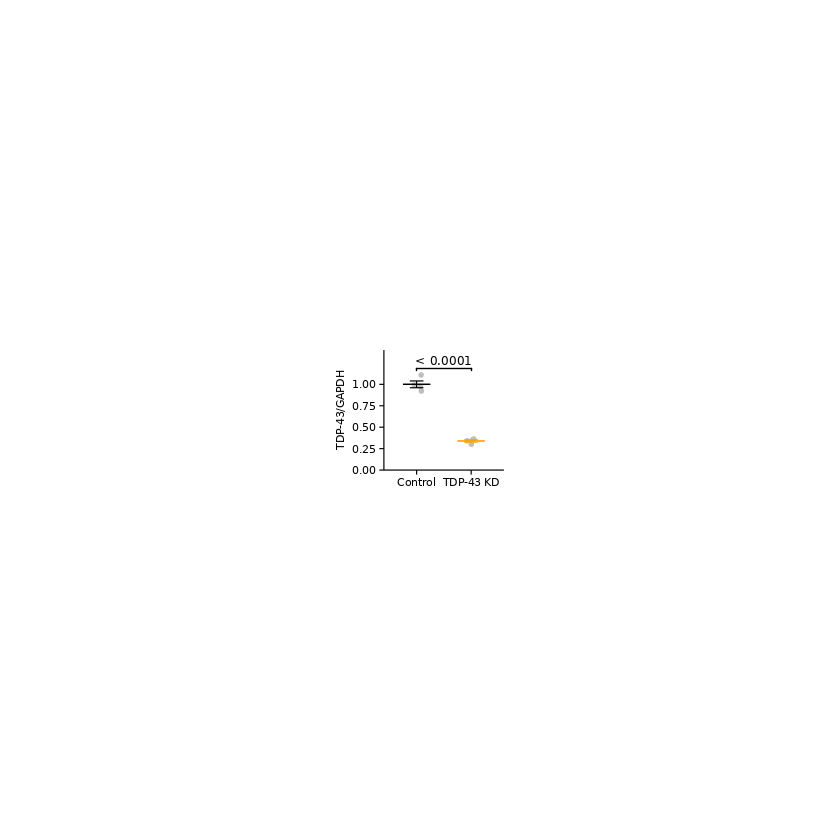

In [14]:
ELP1_WB[target == "TDP-43"] |>
    tidyplot(x = Sample, y = normalized_ratio, color = Sample) |>
    add_data_points_jitter(jitter_width = 0.2, size = 0.5, color = "gray") |>
    add_mean_dash(width = 0.5) |>
    add_sem_errorbar(width = 0.25) |>
    add_test_pvalue(hide_info = TRUE, 
                       method = "t_test",
                       method.args = list(alternative = "greater"),
                       ref.group = "Control") |>
    adjust_colors(new_colors = c("black", "orange")) |> 
    remove_x_axis_title() |>
    adjust_y_axis(title = "TDP-43/GAPDH",
                  limits = c(0, 1.4),
                  breaks = c(0, 0.25, 0.5, 0.75, 1.0)) |>
    remove_legend() |>
    adjust_size(width = 1, height = 1, unit = "in") |>
    adjust_font(fontsize = 6) |>
    save_plot("fig_4b_TDP43-7D-KD-TDP43-WB-quantitation-plot.pdf", 
              view_plot = TRUE,
              bg = "transparent",
              dpi = 300)

## Fig. 4c, NEFL polyA_site_plot

In [15]:
NELF_long = melt(apa[gene_name == "NEFL"], 
    id.vars = "PAS_ID", 
    measure.vars = c('Scramble-7d-1_usage','Scramble-7d-2_usage','Scramble-7d-3_usage',
                     'TDP43KD-7d-1_usage','TDP43KD-7d-2_usage','TDP43KD-7d-3_usage'))
NELF_long[, condition := tstrsplit(variable, "-", keep = 1)]

In [16]:
NELF_long[, site := tstrsplit(PAS_ID, ":", keep = 2, type.convert = T)]

In [17]:
NELF_polyA_site_plot = 
    ggplot(NELF_long, aes(factor(-site), value, color = condition)) +  
        stat_summary(aes(group = condition),fun = mean, geom = "path", show.legend = F) +
        geom_jitter(size=1, alpha=0.25, width = 0.1, show.legend = F) +
        stat_summary(fun.data = mean_se, geom = "pointrange", show.legend = F, size = 0.05) +
        scale_color_manual(values = c("black", "orange")) +
        scale_x_discrete(labels = unique(-NELF_long$site)) +
        scale_y_continuous(labels = scales::percent, limits = c(0, 0.8)) +
        xlab("NEFL polyA sites\n(Proximal > Distal)") +
        ylab("PolyA site usage") +
        theme_classic(base_size = 7) +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [18]:
NELF_polyA_site_plot = 
    ggplot(NELF_long, aes(factor(-site), value, color = condition)) +  
        stat_summary(aes(group = condition),fun = mean, geom = "path", show.legend = F, linewidth = 0.25) +
        stat_summary(fun.data = "mean_se",
                         geom = "errorbar",
                         linewidth = 0.25,
                         width = 0.1,
                         show.legend = F) +
        stat_summary(fun = mean,
                     fun.min = mean,
                     fun.max = mean,
                     geom = "errorbar",
                     linewidth = 0.25,
                     width = 0.15,
                     show.legend = F) +
        geom_jitter(size=1, alpha=0.25, width = 0.1, show.legend = F) +
        scale_color_manual(values = c("black", "orange")) +
        scale_x_discrete(labels = unique(-NELF_long$site)) +
        scale_y_continuous(labels = scales::percent, limits = c(0, 0.8)) +
        xlab("NEFL polyA sites\n(Proximal > Distal)") +
        ylab("PolyA site usage") +
        theme_classic(base_size = 7) +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))

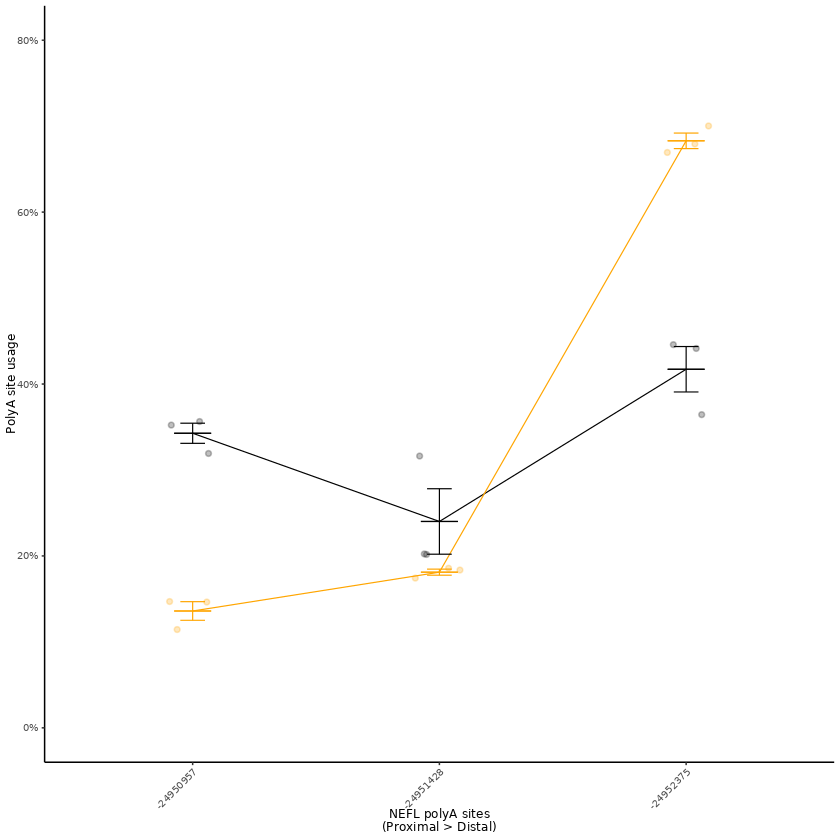

In [19]:
NELF_polyA_site_plot

In [20]:
ggsave(NELF_polyA_site_plot, filename = "fig_4c_NEFL_polyA_site_plot.pdf", width = 1.2, height = 1.75, units = "in")

## Fig. 4d, NEFL WB quantitation

In [21]:
NEFL_WB = fread("Fig_4d_TDP43-7d-KD_NEFL-WB-quantitation.csv")

✔ save_plot: saved to fig_4d_TDP43-7D-KD-NEFL-WB-quantitation-plot.pdf



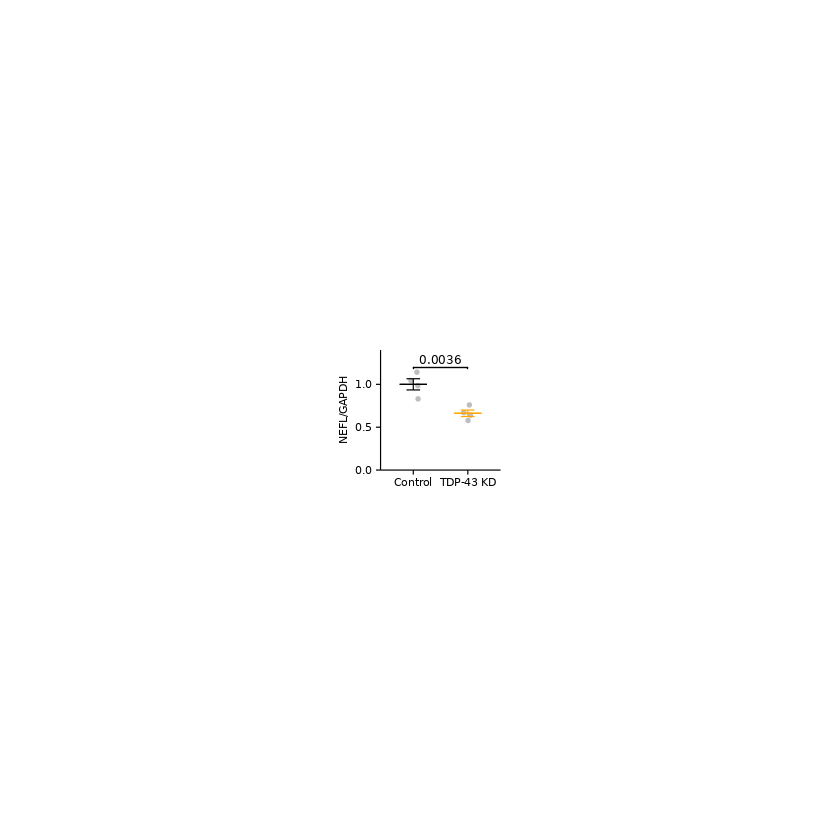

In [22]:
NEFL_WB |>
    tidyplot(x = Sample, y = normalized_ratio, color = Sample) |>
    add_data_points_jitter(jitter_width = 0.2, size = 0.5, color = "gray") |>
    add_mean_dash(width = 0.5) |>
    add_sem_errorbar(width = 0.25) |>
    add_test_pvalue(hide_info = TRUE, 
                       method = "t_test",
                       method.args = list(alternative = "greater"),
                       ref.group = "Control", ) |>
    adjust_colors(new_colors = c("black", "orange")) |> 
    remove_x_axis_title() |>
    adjust_y_axis(title = "NEFL/GAPDH",
                  limits = c(0, 1.4),
                  breaks = c(0, 0.5, 1.0)) |>
    remove_legend() |>
    adjust_size(width = 1, height = 1, unit = "in") |>
    adjust_font(fontsize = 6) |>
    save_plot("fig_4d_TDP43-7D-KD-NEFL-WB-quantitation-plot.pdf", 
              view_plot = TRUE,
              bg = "transparent",
              dpi = 300)

In [23]:
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /share/software/user/open/openblas/0.3.10/lib/libopenblas_haswellp-r0.3.10.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] Cairo_1.6-2       patchwork_1.2.0   ggpubr_0.6.0      tidyplots_0.2.2  
[5] stringr_1.5.1     ggplot2_3.5.0     data.table_1.15.2

loaded via a namespace (and not attached):
 [1] pillar_1.9.0      compiler_4.2.0    base64enc_0.1-3   tools_4.2.0      
 [5] getPass_0.2-4     digest_0.6.3